# SMS Spam Detection
using NLP and classifier

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1') #encoding because got UnicodeDecodeError: 'utf-8' error

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.duplicated().sum()

403

In [4]:
df=df.drop_duplicates(keep='first')

In [31]:
df.shape

(5169, 2)

In [12]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [21]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'Label','v2':'SMS'},inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df['Label']=le.fit_transform(df['Label'])

## EDA

In [32]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1d96bd75850>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

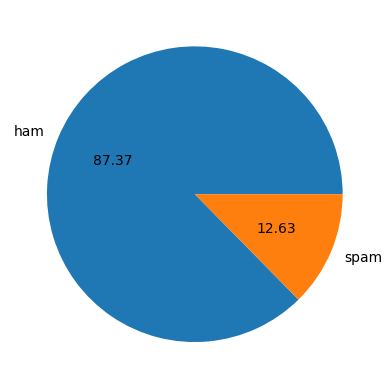

In [36]:
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

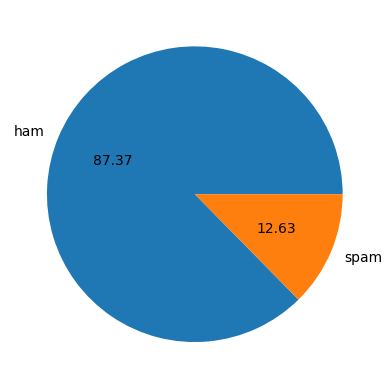

In [12]:
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [13]:
import nltk

In [14]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_of_characters']=df['SMS'].apply(len)

In [16]:
df['num_of_words']=df['SMS'].apply(lambda a:len(nltk.word_tokenize(a)))

In [17]:
df['num_of_sentences']=df['SMS'].apply(lambda a:len(nltk.sent_tokenize(a)))

In [57]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#ham
df[df['Label']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
#spam
df[df['Label']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

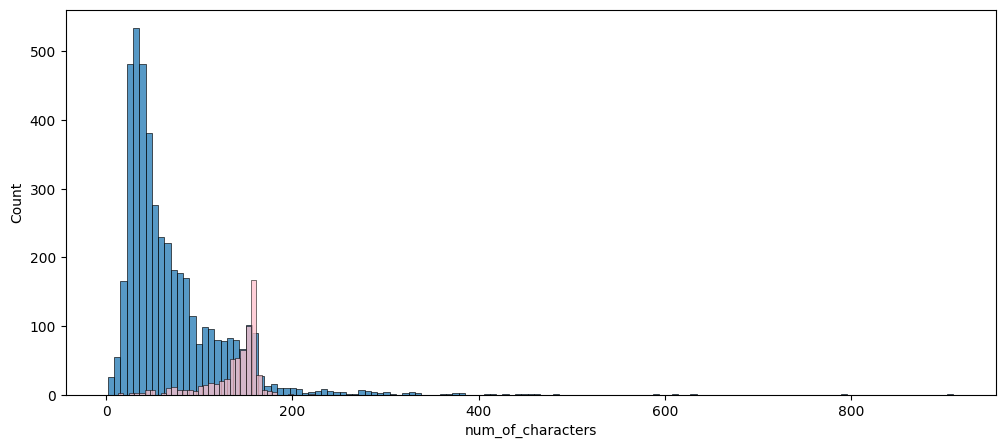

In [67]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Label']==0]['num_of_characters'])
sns.histplot(df[df['Label']==1]['num_of_characters'],color='pink')

<Axes: xlabel='num_of_words', ylabel='Count'>

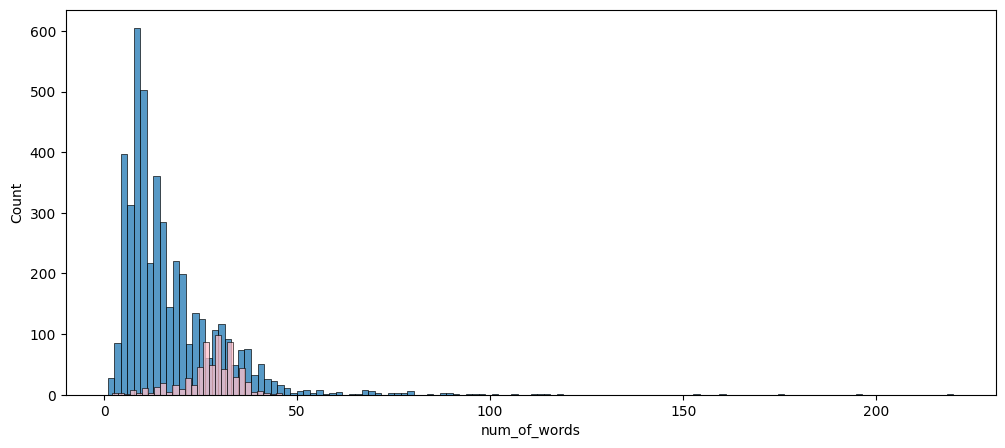

In [68]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Label']==0]['num_of_words'])
sns.histplot(df[df['Label']==1]['num_of_words'],color='pink')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

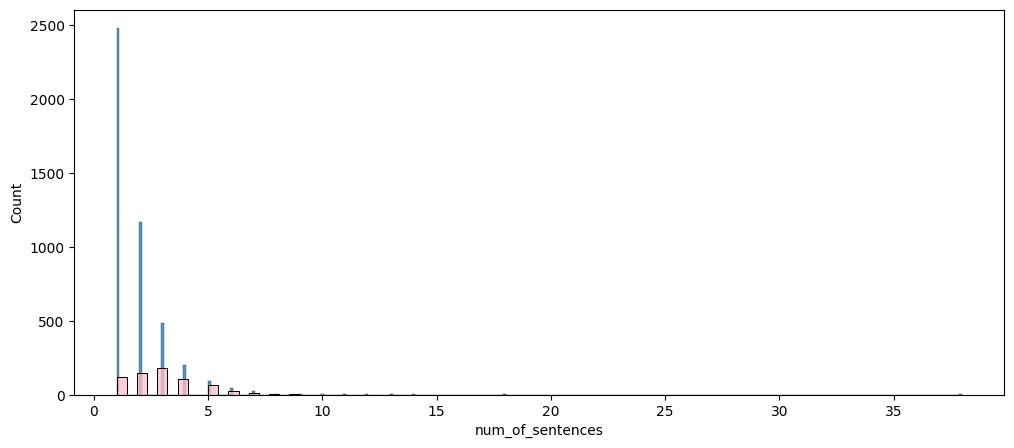

In [69]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Label']==0]['num_of_sentences'])
sns.histplot(df[df['Label']==1]['num_of_sentences'],color='pink')

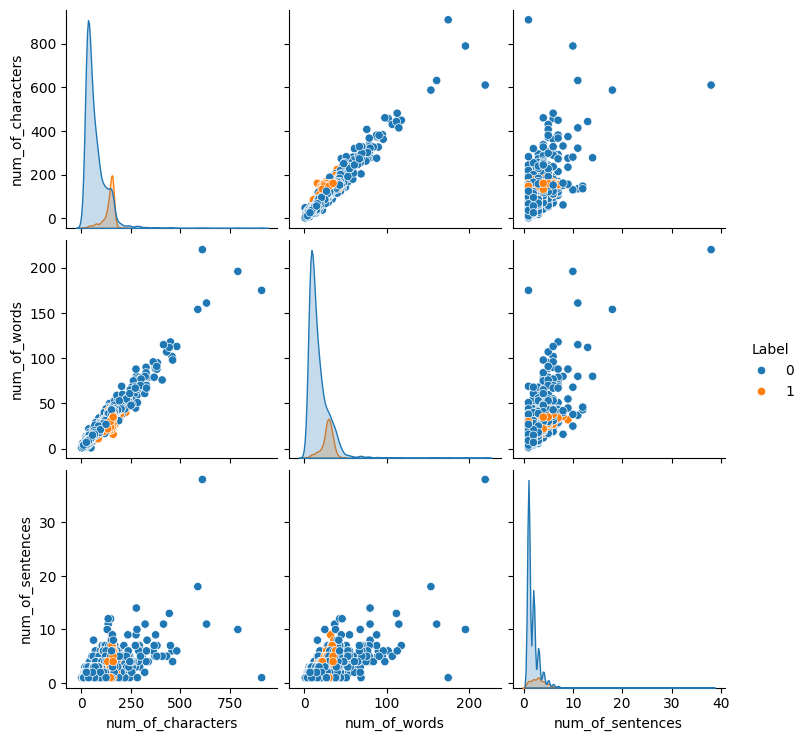

In [70]:
sns.pairplot(df,hue='Label')

<Axes: >

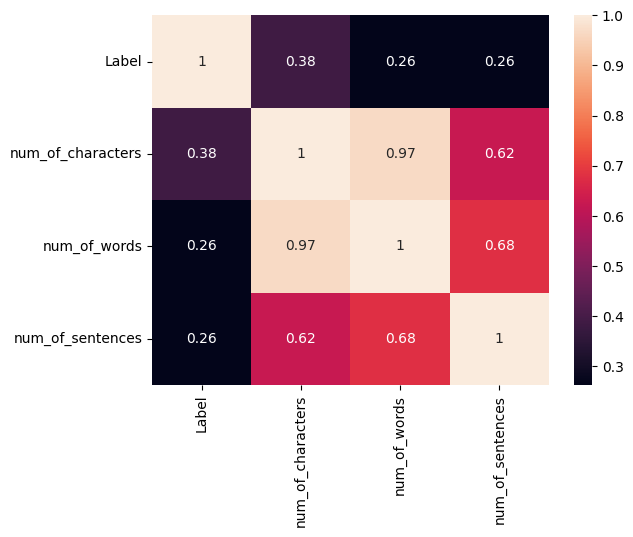

In [74]:
sns.heatmap(df[['Label','num_of_characters','num_of_words','num_of_sentences']].corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [18]:
from nltk.corpus import stopwords

In [19]:
import string

In [20]:
from nltk.stem.porter import PorterStemmer

In [21]:
post=PorterStemmer()

In [22]:
def transform_SMS(SMS):
    SMS=SMS.lower()
    SMS=nltk.word_tokenize(SMS)
    result=[]
    for i in SMS:
        if i.isalnum():
            result.append(i)
    SMS=result[:]
    result.clear()
    for i in SMS:
        if i not in stopwords.words('english') and i not in string.punctuation:
            result.append(i)
    SMS=result[:]
    result.clear()
    for i in SMS:
        result.append(post.stem(i))

    return ' '.join(result)            

In [23]:
df['transformed_SMS']=df['SMS'].apply(transform_SMS)

In [88]:
df.head()

,Label,SMS,num_of_characters,num_of_words,num_of_sentences,transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
from wordcloud import WordCloud
wood=WordCloud()

In [111]:
wc=WordCloud(width=1000,height=1000,min_font_size=12,background_color="white")

In [112]:
spam_words=wood.generate(df[df['Label']==1]['transformed_SMS'].str.cat(sep=' '))
spam_collection=wc.generate(df[df['Label']==1]['transformed_SMS'].str.cat(sep=' '))

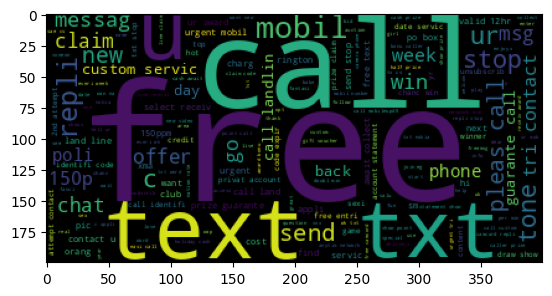

In [92]:
plt.imshow(spam_words)

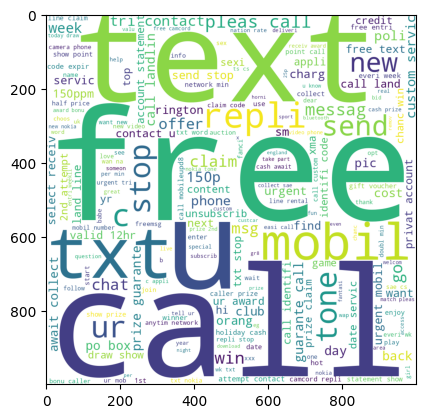

In [113]:
plt.imshow(spam_collection)

In [114]:
ham_words=wood.generate(df[df['Label']==0]['transformed_SMS'].str.cat(sep=' '))
ham_collection=wc.generate(df[df['Label']==0]['transformed_SMS'].str.cat(sep=' '))

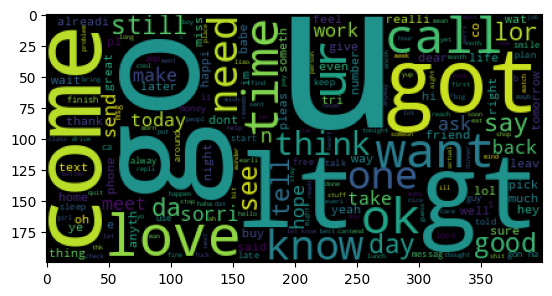

In [116]:
plt.imshow(ham_words)

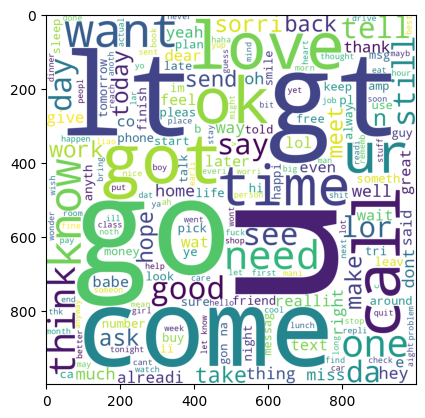

In [117]:
plt.imshow(ham_collection)

### Checking the top 30 frequent words used in spam as well as ham

In [118]:
spam_corpus=[]
for msg in df[df['Label'] == 1]['transformed_SMS'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [119]:
len(spam_corpus)

9939

In [120]:
from collections import Counter

In [127]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


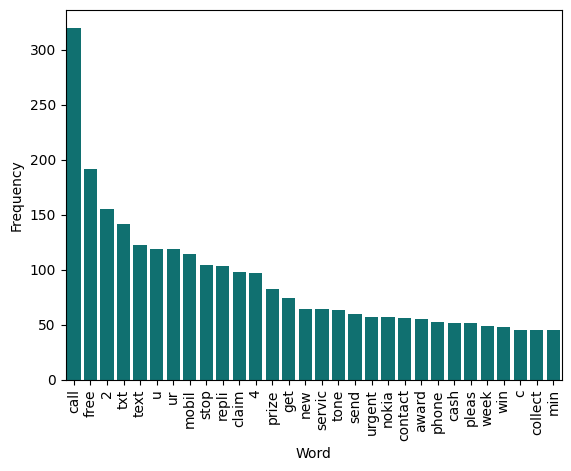

In [154]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=data,color='teal')
plt.xticks(rotation='vertical')
plt.show()

In [155]:
ham_corpus=[]
for msg in df[df['Label'] == 0]['transformed_SMS'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [156]:
len(ham_corpus)

35404

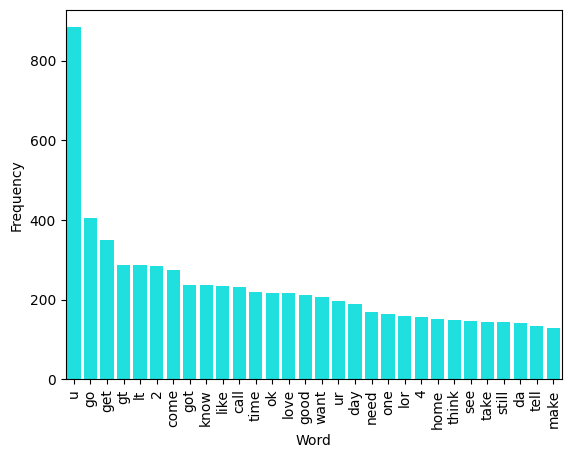

In [158]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=data,color='cyan')
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

### from NLP using Bag of Words to vectorize
and applying Gaussian, Multinomial, Bernoulli Naive Bayes

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [161]:
X_cv=cv.fit_transform(df['transformed_SMS']).toarray()

In [163]:
X_cv.shape

(5169, 6708)

In [29]:
y=df['Label'].values

In [24]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size=0.2,random_state=2)

In [25]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [170]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [171]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [172]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### from NLP using TF-IDF to vectorize
and applying Gaussian, Multinomial, Bernoulli Naive Bayes

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

In [27]:
X_tfid=tfid.fit_transform(df['transformed_SMS']).toarray()

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_tfid,y,test_size=0.2,random_state=2)

In [180]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [169]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [182]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### We will choose TF-IDF vectorization method because through it we could get a 100% precission i.e. predicted all spam correctly which is waht we require

just for practice comparing MNB with all other classifiers

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [167]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier(n_neighbors=1)
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
adbc=AdaBoostClassifier(n_estimators=50,random_state=42)
bgc=BaggingClassifier(n_estimators=50,random_state=42)
xtc=ExtraTreesClassifier(n_estimators=50,random_state=42)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=42)
xgbc=XGBClassifier(n_estimators=50,random_state=42)

In [170]:
models={
    'LR':lr,
    'SVC':svc,
    'DTC':dtc,
    'KNN':knn,
    'MNB':mnb,
    'RFC':rfc,
    'ADBC':adbc,
    'BGC':bgc,
    'XTC':xtc,
    'GBC':gbc,
    'XGBC':xgbc,
}

In [171]:
def training_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [172]:
accuracy_scores = []
precision_scores = []

for model_name,model in models.items():
    
    current_accuracy,current_precision = training_model(model, X_train,y_train,X_test,y_test)
    
    print("For ",model_name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  DTC
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  KNN
Accuracy -  0.925531914893617
Precision -  0.9841269841269841
For  MNB
Accuracy -  0.9593810444874274
Precision -  1.0
For  RFC
Accuracy -  0.9729206963249516
Precision -  0.9910714285714286


C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  ADBC
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BGC
Accuracy -  0.9584139264990329
Precision -  0.8571428571428571
For  XTC
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  GBC
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGBC
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [215]:
performance_dataframe=pd.DataFrame({'Model Name':models.keys(), 'Accuracy Score':accuracy_scores, 'Precision Score':precision_scores}).sort_values('Precision Score',ascending=False)

In [216]:
performance_dataframe

,Model Name,Accuracy Score,Precision Score
4,MNB,0.959381,1.000000
5,RFC,0.972921,0.991071
3,KNN,0.925532,0.984127
8,XTC,0.976789,0.983051
1,SVC,0.972921,0.974138
6,ADBC,0.961315,0.945455
10,XGBC,0.972921,0.943548
0,LR,0.951644,0.940000
9,GBC,0.952611,0.923810
7,BGC,0.958414,0.857143


### Trying to tune RFC to increase accuracy score

In [174]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
rf_grid = GridSearchCV(estimator = rfc, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [178]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [179]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [180]:
rf_grid.best_score_

0.9673518742442564

In [182]:
rf = RandomForestClassifier(max_depth=None, max_features=0.2, max_samples=1.0, n_estimators=100)
current_accuracy,current_precision = training_model(model, X_train,y_train,X_test,y_test) 
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)

Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


### Trying to tune KNN to increase accuracy score

In [214]:
accuracy=[]
for i in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred_check=KNN.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred_check))
    print(i,accuracy[i-1])

1 0.925531914893617
2 0.9081237911025145
3 0.9081237911025145
4 0.9003868471953579
5 0.9003868471953579
6 0.8897485493230174
7 0.8897485493230174
8 0.8752417794970987
9 0.8752417794970987


In [220]:
performance_dataframe1 = pd.melt(performance_dataframe, id_vars = "Model Name")

In [221]:
performance_dataframe1

,Model Name,variable,value
0,MNB,Accuracy Score,0.959381
1,RFC,Accuracy Score,0.972921
2,KNN,Accuracy Score,0.925532
3,XTC,Accuracy Score,0.976789
4,SVC,Accuracy Score,0.972921
5,ADBC,Accuracy Score,0.961315
6,XGBC,Accuracy Score,0.972921
7,LR,Accuracy Score,0.951644
8,GBC,Accuracy Score,0.952611
9,BGC,Accuracy Score,0.958414


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_17116\2078565232.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.catplot(x = 'Model Name', y='value',


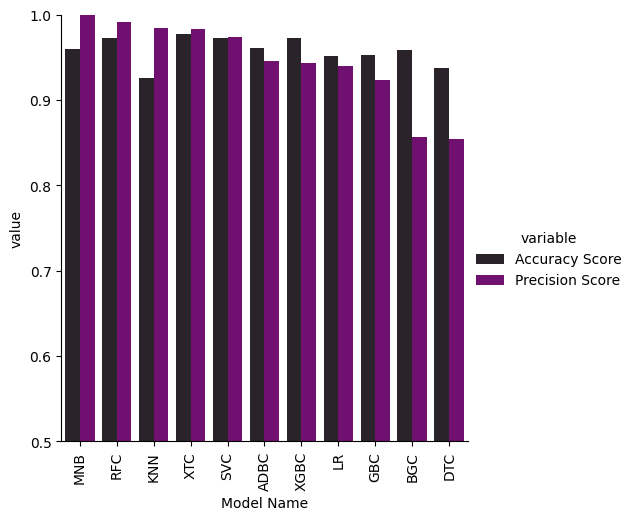

In [241]:
sns.catplot(x = 'Model Name', y='value', 
               hue = 'variable',data=performance_dataframe1, kind='bar',height=5,color='purple')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Tuning

In [244]:
tfid=TfidfVectorizer(max_features=3000)
X_tfid=tfid.fit_transform(df['transformed_SMS']).toarray()
X_train,X_test,y_train,y_test = train_test_split(X_tfid,y,test_size=0.2,random_state=2)
accuracy_scores = []
precision_scores = []

for model_name,model in models.items():
    
    current_accuracy,current_precision = training_model(model, X_train,y_train,X_test,y_test)
    
    print("For ",model_name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  DTC
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  KNN
Accuracy -  0.9352030947775629
Precision -  1.0
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  RFC
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386


C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  ADBC
Accuracy -  0.9613152804642167
Precision -  0.9375
For  BGC
Accuracy -  0.960348162475822
Precision -  0.8592592592592593
For  XTC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBC
Accuracy -  0.9477756286266924
Precision -  0.92
For  XGBC
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [245]:
temp_df = pd.DataFrame({'Model Name':models.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_dataframe.merge(temp_df,on='Model Name')

In [246]:
new_df

,Model Name,Accuracy Score,Precision Score,Accuracy_max_ft_3000,Precision_max_ft_3000
0,MNB,0.959381,1.000000,0.970986,1.000000
1,RFC,0.972921,0.991071,0.974855,0.991228
2,KNN,0.925532,0.984127,0.935203,1.000000
3,XTC,0.976789,0.983051,0.976789,0.975000
4,SVC,0.972921,0.974138,0.975822,0.974790
5,ADBC,0.961315,0.945455,0.961315,0.937500
6,XGBC,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBC,0.952611,0.923810,0.947776,0.920000
9,BGC,0.958414,0.857143,0.960348,0.859259


In [247]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [248]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [249]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [250]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [252]:
# Applying stacking
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [258]:
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [261]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [262]:
y_pred = stacking.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [208]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))